In [1]:
import pandas as pd
#import numpy as np
pd.set_option("display.max_columns", 300)
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [3]:
ordinal.shape

(2580, 81)

In [4]:
outs = ordinal.loc[[50, 309, 2004]]
outs

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
50,50,3,3,3,3,2,3,6,0,0,0,0,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,2.0,2.0,5.0,6.0,3.0,0.0,0.0,6.0,2.0,4.0,3.0,9.0,1.0,15.0,0.0,1.0,2592,150000,10890,5,6,1923,1950,1296,1296,0,2,0,6,2,12,0,0,742,240,0,0,0,1512,60.0,0.0,371.0,0.0,925.0,1296.0,2.0,0.0,1976.982048,0.0,0.0
309,309,5,3,5,3,5,5,8,4,3,3,3,0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,2.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,2.0,4.0,1.0,6.0,5.0,10.0,1.0,1.0,4676,184750,40094,10,5,2007,2008,3138,1538,0,3,1,3,1,11,1,208,406,0,0,0,0,0,130.0,762.0,2260.0,0.0,878.0,3138.0,1.0,0.0,2007.000000,3.0,884.0
2004,2004,4,4,3,3,5,5,8,3,1,5,3,0,6.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,3.0,1.0,6.0,13.0,14.0,2.0,0.0,2.0,6.0,6.0,1.0,1.0,3.0,5.0,2.0,0.0,1.0,9.0,4.0,12.0,8.0,0.0,3608,475000,22950,10,9,1892,1993,1518,1518,572,2,1,4,1,12,2,0,260,0,0,410,0,0,90.0,0.0,0.0,0.0,1107.0,1107.0,0.0,0.0,1993.000000,3.0,840.0


In [5]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [6]:
idx1 = outs.index
idx1

Int64Index([50, 309, 2004], dtype='int64')

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [8]:
X = ordinal.values

In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
X_reduce = pca.fit_transform(X_scaled)

In [11]:
X_reduce

array([[-2.75590431, -1.06666059,  0.81418589],
       [-0.50064311, -4.34240104, -0.70891704],
       [-3.34008726, -1.52663274, -0.53528362],
       ...,
       [-1.79200237,  3.81389723,  0.7432274 ],
       [ 3.38702447,  0.71375524, -1.32791943],
       [ 3.29690124,  1.85679894, -1.40566449]])

In [12]:
outlier_index = list(outs.index)
outlier_index

[50, 309, 2004]

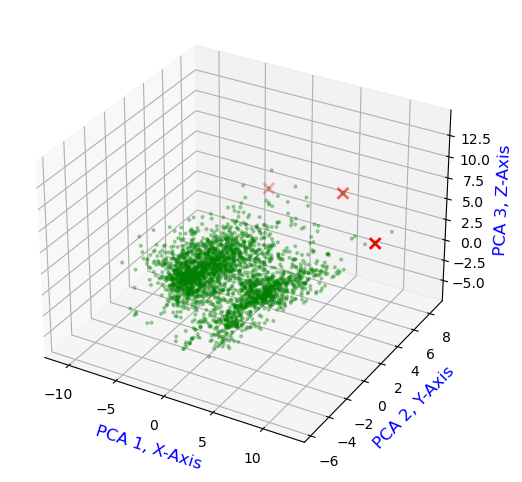

In [13]:
plt.style.use('default')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PCA 1, X-Axis', fontsize=12, color='blue')
ax.set_ylabel('PCA 2, Y-Axis', fontsize=12, color='blue')
ax.set_zlabel('PCA 3, Z-Axis', fontsize=12, color='blue')

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, 
           label="inliers",c="green", alpha=0.3)

ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers");


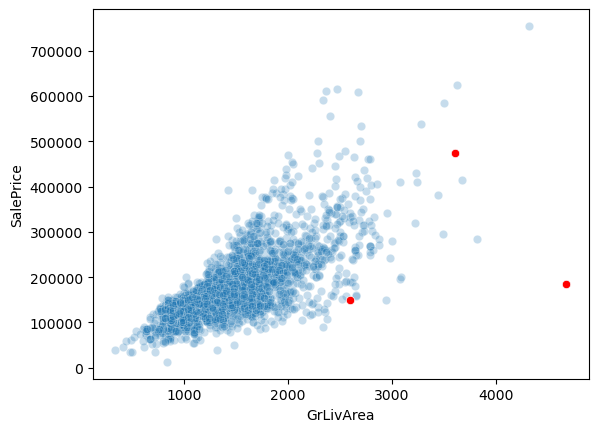

In [14]:
sns.scatterplot(data=ordinal, x='GrLivArea', y='SalePrice', alpha=0.25)
sns.scatterplot(data=outs, x='GrLivArea', y='SalePrice', color='red');

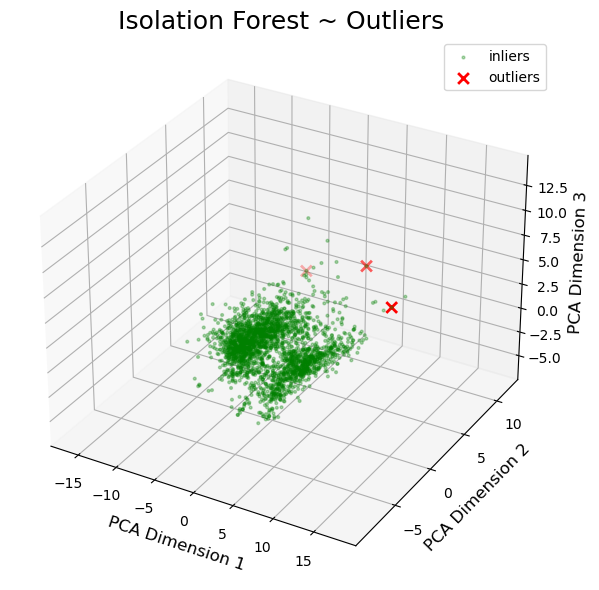

In [15]:
plt.style.use('default')
#plt.style.use('ggplot')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
#ax.set_zlabel("x_composite_3")




#plt.figure(figsize=(8,4))
#sns.boxplot(data=combo[['SLR MAE Area', 'SLR MAE Qual']], showmeans=True,
#                        meanprops={"marker":"o",
#                       "markerfacecolor":"white", 
#                       "markeredgecolor":"black",
#                      "markersize":"8"}, palette='coolwarm')
#plt.xticks(rotation=25)
#plt.ylabel('Mean Absolute Error (US$)', fontsize=14)
#plt.xlabel('Model', fontsize=14)
#plt.title('K-Fold CV MAE Comparison By Model', fontsize=18, color='blue')

#plt.tight_layout();



# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, 
           label="inliers",c="green", alpha=0.3)

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("Isolation Forest ~ Outliers", fontsize=18, color='black')
ax.set_xlabel('PCA Dimension 1', fontsize=12)
ax.set_ylabel('PCA Dimension 2', fontsize=12)
ax.set_zlabel('PCA Dimension 3', fontsize=12)
plt.margins(x=0.3, y=0.3)
plt.tight_layout()
plt.show();

In [16]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

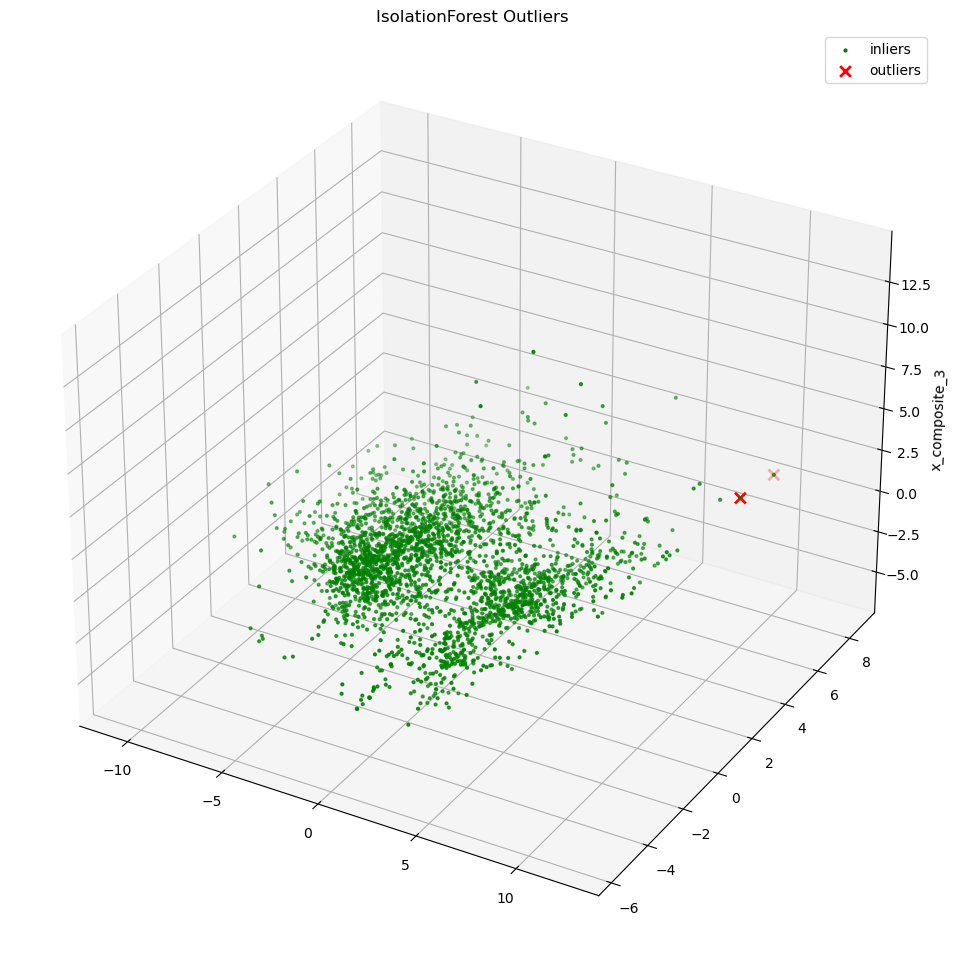

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("IsolationForest Outliers")
plt.show()

In [18]:
outlier_index = list(chosen.index)
outlier_index

NameError: name 'chosen' is not defined

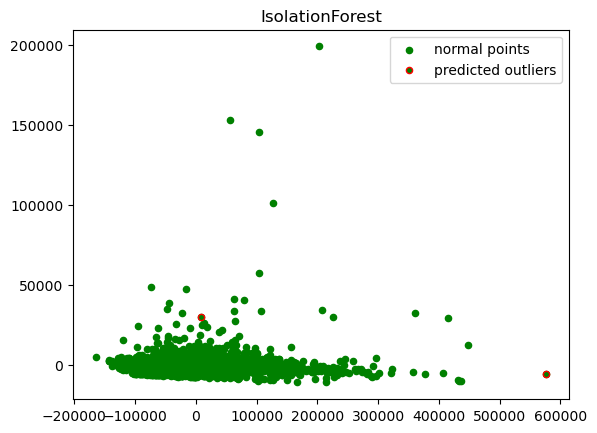

In [19]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [20]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

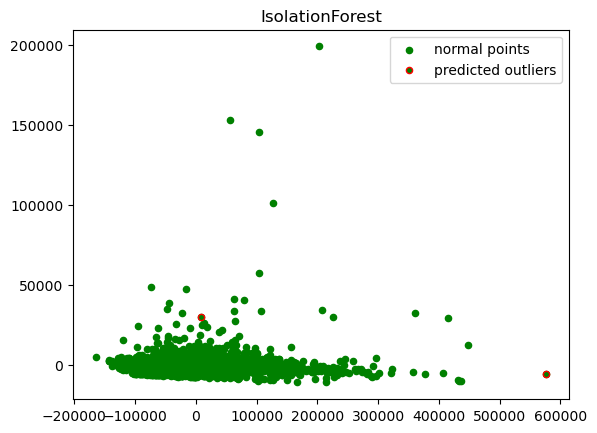

In [21]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()